In [2]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 34.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=

In [4]:
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
rf = Roboflow(api_key="UYTUzKsMZToy79NfRukz")
project = rf.workspace("cvbnqq").project("handsdetector-cgoki")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
version = project.version(1)
dataset = version.download("yolov11")


Extracting Dataset Version Zip to HandsDetector-1 in yolov11:: 100%|██████████| 7692/7692 [00:00<00:00, 9616.25it/s] 


In [8]:
!ls

HandsDetector-1


In [9]:
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.6MB/s]


In [10]:
!ls ./HandsDetector-1/

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [11]:
data_yaml = "./HandsDetector-1/data.yaml"

In [12]:
results = model.train(data=data_yaml, epochs=10, imgsz=640, optimizer="AdamW")

Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./HandsDetector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 17.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/HandsDetector-1/train/labels... 2688 images, 9 backgrounds, 0 corrupt: 100%|██████████| 2688/2688 [00:02<00:00, 1283.05it/s]


train: New cache created: /kaggle/working/HandsDetector-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 562.2±190.8 MB/s, size: 19.6 KB)


val: Scanning /kaggle/working/HandsDetector-1/valid/labels... 768 images, 0 backgrounds, 0 corrupt: 100%|██████████| 768/768 [00:00<00:00, 1283.37it/s]

val: New cache created: /kaggle/working/HandsDetector-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.28G      1.438      1.362       1.39         47        640: 100%|██████████| 168/168 [00:30<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:07<00:00,  3.33it/s]

                   all        768       2392      0.536      0.504      0.488      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       2.8G      1.428      1.126      1.382         44        640: 100%|██████████| 168/168 [00:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.04it/s]


                   all        768       2392      0.694      0.604      0.664      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       2.8G      1.365      1.036      1.336         50        640: 100%|██████████| 168/168 [00:27<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.98it/s]


                   all        768       2392      0.797      0.737      0.807      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       2.8G      1.307     0.9492      1.302         44        640: 100%|██████████| 168/168 [00:28<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.13it/s]


                   all        768       2392      0.824      0.722      0.815      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       2.8G      1.238     0.8665      1.255         50        640: 100%|██████████| 168/168 [00:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.14it/s]


                   all        768       2392      0.872      0.819       0.89      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.8G      1.182     0.7902      1.222         43        640: 100%|██████████| 168/168 [00:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.03it/s]


                   all        768       2392      0.912      0.839      0.917      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       2.8G      1.144     0.7431      1.202         47        640: 100%|██████████| 168/168 [00:28<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.83it/s]


                   all        768       2392      0.938      0.868      0.944      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.8G      1.089     0.6854      1.169         41        640: 100%|██████████| 168/168 [00:28<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.19it/s]


                   all        768       2392      0.929      0.853      0.931      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       2.8G      1.062     0.6441      1.147         47        640: 100%|██████████| 168/168 [00:28<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.14it/s]

                   all        768       2392       0.95      0.897      0.957       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       2.8G      1.024      0.598      1.127         45        640: 100%|██████████| 168/168 [00:27<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  5.12it/s]


                   all        768       2392      0.949      0.923      0.968      0.714

10 epochs completed in 0.094 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:06<00:00,  3.79it/s]


                   all        768       2392      0.949      0.923      0.968      0.714


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


In [19]:
!ls ./runs/detect/train/weights/best.pt

./runs/detect/train/weights/best.pt


In [20]:
model_weights_best_path = "./runs/detect/train/weights/best.pt"
model = YOLO(model_weights_best_path)

In [21]:
!ls ./HandsDetector-1/valid/images

CARDS_COURTYARD_B_T_frame_0189_jpg.rf.4d8c40693191b4f74ebe37a81da79808.jpg
CARDS_COURTYARD_B_T_frame_0781_jpg.rf.cee8db99160d715f4b4b0746475fb548.jpg
CARDS_COURTYARD_B_T_frame_0906_jpg.rf.0528b97e95427d7cc1686df924d7c81e.jpg
CARDS_COURTYARD_B_T_frame_0912_jpg.rf.02452880b639cb6a01d54df65b43052b.jpg
CARDS_COURTYARD_B_T_frame_1577_jpg.rf.8f9292aac561c0162558301f031b10ae.jpg
CARDS_COURTYARD_B_T_frame_1758_jpg.rf.e2166cc30046c484d3359983c2ed763d.jpg
CARDS_COURTYARD_B_T_frame_1812_jpg.rf.f688aeeb51241bec191686eb1c60fbb6.jpg
CARDS_COURTYARD_B_T_frame_1930_jpg.rf.2cbfcf0ecce215ea9abc278972844be9.jpg
CARDS_COURTYARD_B_T_frame_2208_jpg.rf.633902dbb7cc9876feac129a79972752.jpg
CARDS_COURTYARD_B_T_frame_2334_jpg.rf.9b91076a34387dca71e4d796db7d6430.jpg
CARDS_COURTYARD_B_T_frame_2366_jpg.rf.0efcd8da5f6a93319a91a22cd9bd29ed.jpg
CARDS_COURTYARD_B_T_frame_2699_jpg.rf.cef5b407a46537ccdc6434e0d49c7fa3.jpg
CARDS_COURTYARD_H_S_frame_0060_jpg.rf.adb0c2821fc4767671b39c3006c0d266.jpg
CARDS_COURTYARD_H_S_frame


image 1/1 /kaggle/working/HandsDetector-1/valid/images/JENGA_COURTYARD_T_S_frame_1637_jpg.rf.1ea69c9787d400665b891b50cb9ab7ff.jpg: 640x640 4 hands, 10.4ms
Speed: 2.8ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


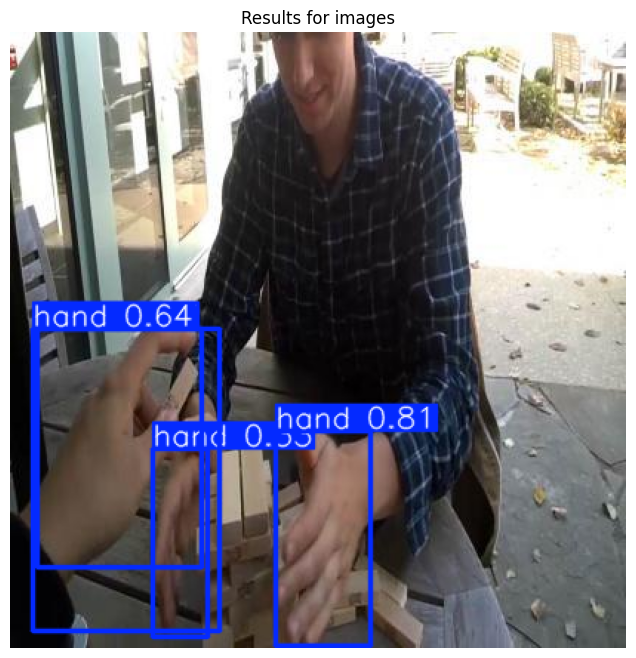


image 1/1 /kaggle/working/HandsDetector-1/valid/images/JENGA_OFFICE_B_S_frame_1846_jpg.rf.67104a3bd644853d87178ecad58c0584.jpg: 640x640 4 hands, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


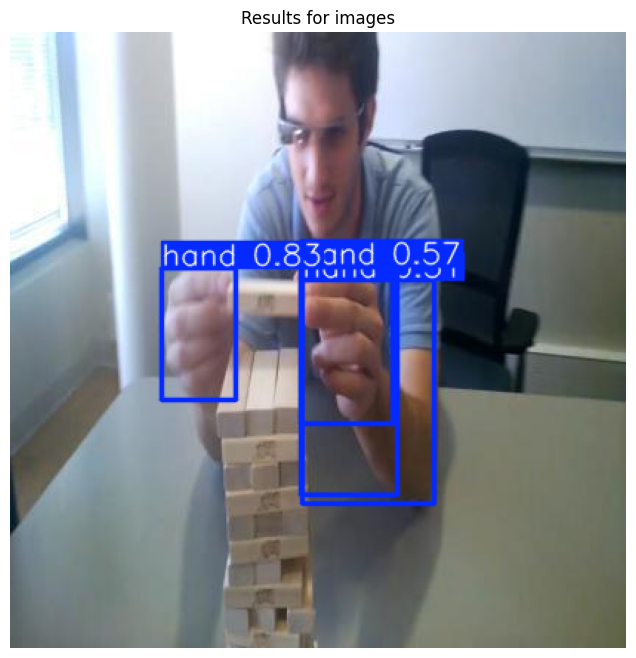


image 1/1 /kaggle/working/HandsDetector-1/valid/images/CHESS_LIVINGROOM_S_B_frame_1062_jpg.rf.a668e89891e8b4ac32aa03d8e6d81fea.jpg: 640x640 3 hands, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


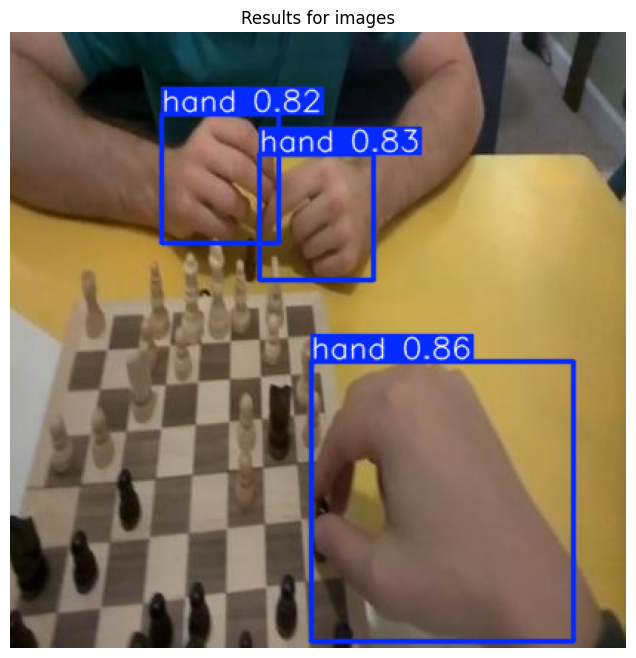


image 1/1 /kaggle/working/HandsDetector-1/valid/images/PUZZLE_COURTYARD_S_B_frame_2314_jpg.rf.2d9a58f71599fb86bd8480d1dad22135.jpg: 640x640 3 hands, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


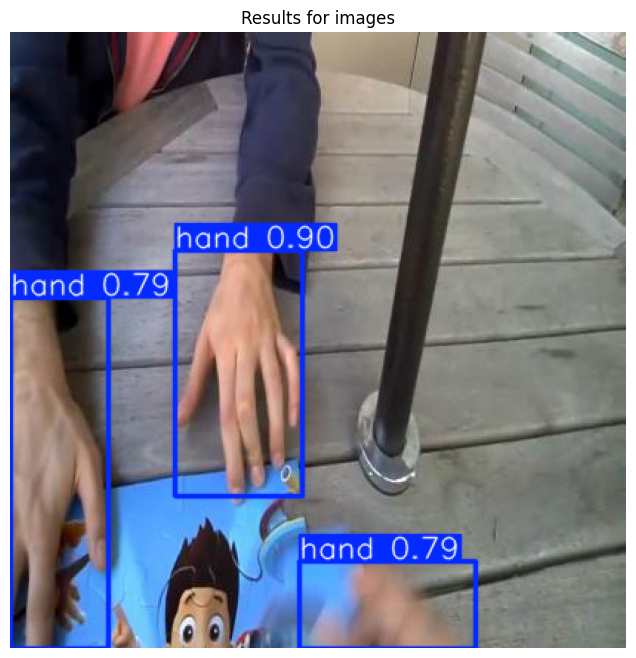


image 1/1 /kaggle/working/HandsDetector-1/valid/images/CARDS_OFFICE_S_B_frame_1128_jpg.rf.7da0e7f59a0f9375310082e0a44e1096.jpg: 640x640 2 hands, 13.4ms
Speed: 3.0ms preprocess, 13.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


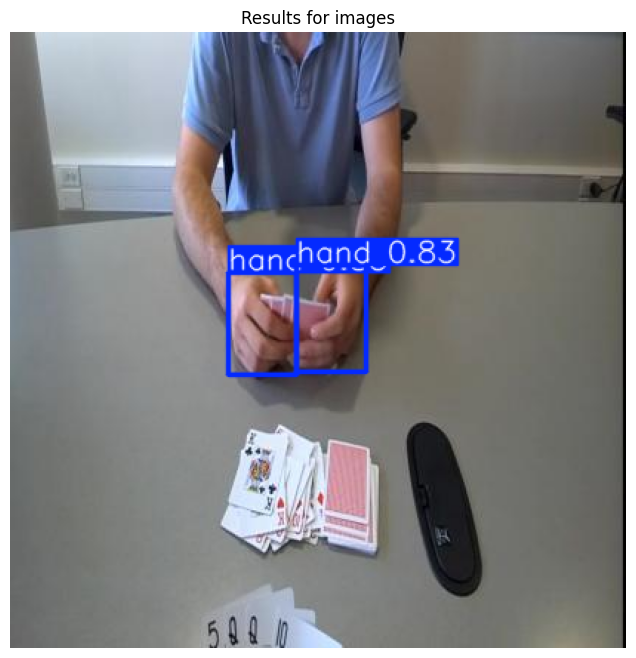

In [24]:
image_path = Path("./HandsDetector-1/valid/images")
image_paths = list(image_path.glob("*.jpg"))[0:5]

# image_paths
for path in image_paths:
    results = model.predict(path)
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        conf = result.boxes.conf.cpu().numpy()
        classes = result.boxes.cls.cpu().numpy()

        # print(f"\n🔹 Результаты для {image_path.name}:")
        # for box, conf, cls in zip(boxes, conf, classes):
        #     print(f"  Класс: {cls}, Уверенность: {conf:.2f}, Координаты: {box}")
        result_img = result.plot()
        result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)  # OpenCV -> Matplotlib

        plt.figure(figsize=(8, 8))
        plt.imshow(result_img)
        plt.axis("off")
        plt.title(f"Results for {image_path.name}")
        plt.show()

In [38]:
!ls /kaggle/input/video1

video.mov


In [62]:
video_path = "/kaggle/input/video1/video.mov"
model.predict(video_path, save=True, conf=0.5)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/253) /kaggle/input/video1/video.mov: 448x640 (no detections), 12.5ms
video 1/1 (frame 2/253) /kaggle/input/video1/video.mov: 448x640 (no detections), 9.3ms
video 1/1 (frame 3/253) /kaggle/input/video1/video.mov: 448x640 (no detections), 11.2ms
video 1/1 (frame 4/253) /kaggle/input/video1/video.mov: 448x640 (no detections), 16.4ms
video 1/1 (frame 5/253) /kaggle/input/video1/video.mov: 448x640 (no detections), 15.6ms
video 1/1 (frame 

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'hand'}
 obb: None
 orig_img: array([[[149, 162, 156],
         [149, 162, 156],
         [149, 162, 156],
         ...,
         [120, 135, 138],
         [120, 135, 138],
         [120, 135, 138]],
 
        [[142, 155, 149],
         [142, 155, 149],
         [142, 155, 149],
         ...,
         [120, 135, 138],
         [120, 135, 138],
         [120, 135, 138]],
 
        [[142, 155, 149],
         [142, 155, 149],
         [143, 156, 150],
         ...,
         [120, 135, 138],
         [120, 135, 138],
         [120, 135, 138]],
 
        ...,
 
        [[117, 134, 132],
         [116, 133, 131],
         [116, 133, 131],
         ...,
         [111, 116, 116],
         [111, 116, 116],
         [112, 117, 117]],
 
        [[116, 133, 131],
         [116, 133, 131],
         [116, 133, 131],
         ...,
         [111, 116, 

In [63]:
!ls ./runs/detect/predict

video.avi


In [64]:
!cp ./runs/detect/predict/video.avi /kaggle/working/

In [59]:
!ls -lh runs/detect/predict/

total 19M
-rw-r--r-- 1 root root 19M May 21 11:59 video.avi


In [60]:
import cv2

cap = cv2.VideoCapture("runs/detect/predict/video.avi")
if not cap.isOpened():
    print("Ошибка: видео не открывается!")
else:
    print("Видео открыто успешно. Размер:", cap.get(cv2.CAP_PROP_FRAME_WIDTH), "x", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Видео открыто успешно. Размер: 1080.0 x 720.0


In [61]:
from IPython.display import Video
!ffmpeg -i runs/detect/predict/video.avi -c:v libx264 -preset fast -crf 23 output.mp4
Video("output.mp4", embed=True, width=800)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab